In [29]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import re
import base64
import numpy as np
import pdb
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [53]:
df_train = pd.read_json('train.json')
df_test = pd.read_json('test.json')

In [44]:
df_test.head()

,id,ingredients,all_ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi...",baking powder;eggs;all-purpose flour;raisins;m...
1,28583,"[sugar, egg yolks, corn starch, cream of tarta...",sugar;egg yolks;corn starch;cream of tartar;ba...
2,41580,"[sausage links, fennel bulb, fronds, olive oil...",sausage links;fennel bulb;fronds;olive oil;cub...
3,29752,"[meat cuts, file powder, smoked sausage, okra,...",meat cuts;file powder;smoked sausage;okra;shri...
4,35687,"[ground black pepper, salt, sausage casings, l...",ground black pepper;salt;sausage casings;leeks...


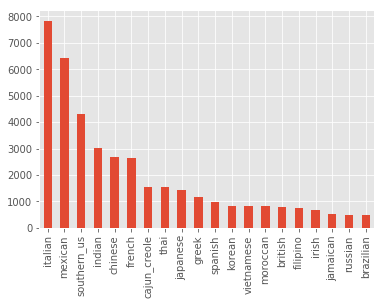

In [6]:
plt.style.use('ggplot')
df_train['cuisine'].value_counts().plot(kind='bar')

In [8]:
counters = {}
for cuisine in df_train['cuisine'].unique():
    counters[cuisine] = Counter()
    indices = (df_train['cuisine'] == cuisine)
    for ingredients in df_train[indices]['ingredients']:
        counters[cuisine].update(ingredients)

In [9]:
counters['italian'].most_common(10)

[('salt', 3454),
 ('olive oil', 3111),
 ('garlic cloves', 1619),
 ('grated parmesan cheese', 1580),
 ('garlic', 1471),
 ('ground black pepper', 1444),
 ('extra-virgin olive oil', 1362),
 ('onions', 1240),
 ('water', 1052),
 ('butter', 1030)]

In [10]:
top10 = pd.DataFrame([[items[0] for items in counters[cuisine].most_common(10)] for cuisine in counters],
            index=[cuisine for cuisine in counters],
            columns=['top{}'.format(i) for i in range(1, 11)])
top10

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
mexican,salt,onions,ground cumin,garlic,olive oil,chili powder,jalapeno chilies,sour cream,avocado,corn tortillas
british,salt,all-purpose flour,butter,milk,eggs,unsalted butter,sugar,onions,baking powder,large eggs
southern_us,salt,butter,all-purpose flour,sugar,large eggs,baking powder,water,unsalted butter,milk,buttermilk
spanish,salt,olive oil,garlic cloves,extra-virgin olive oil,onions,water,tomatoes,ground black pepper,red bell pepper,pepper
brazilian,salt,onions,olive oil,lime,water,garlic cloves,garlic,cachaca,sugar,tomatoes
japanese,soy sauce,salt,mirin,sugar,water,sake,rice vinegar,vegetable oil,scallions,ginger
indian,salt,onions,garam masala,water,ground turmeric,garlic,cumin seed,ground cumin,vegetable oil,oil
greek,salt,olive oil,dried oregano,garlic cloves,feta cheese crumbles,extra-virgin olive oil,fresh lemon juice,ground black pepper,garlic,pepper
jamaican,salt,onions,water,garlic,ground allspice,pepper,scallions,dried thyme,black pepper,garlic cloves
korean,soy sauce,sesame oil,garlic,green onions,sugar,salt,water,sesame seeds,onions,scallions


In [54]:
df_train['all_ingredients'] = df_train['ingredients'].map(";".join)
df_test['all_ingredients'] = df_test['ingredients'].map(";".join)


In [55]:
df_train.head()
df_test.head()


,id,ingredients,all_ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi...",baking powder;eggs;all-purpose flour;raisins;m...
1,28583,"[sugar, egg yolks, corn starch, cream of tarta...",sugar;egg yolks;corn starch;cream of tartar;ba...
2,41580,"[sausage links, fennel bulb, fronds, olive oil...",sausage links;fennel bulb;fronds;olive oil;cub...
3,29752,"[meat cuts, file powder, smoked sausage, okra,...",meat cuts;file powder;smoked sausage;okra;shri...
4,35687,"[ground black pepper, salt, sausage casings, l...",ground black pepper;salt;sausage casings;leeks...


In [56]:
df_train['all_ingredients'].str.contains('garlic cloves')
df_test['all_ingredients'].str.contains('garlic cloves')


0       False
1       False
2       False
3        True
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12       True
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24       True
25      False
26       True
27       True
28      False
29      False
        ...  
9914     True
9915    False
9916    False
9917    False
9918    False
9919    False
9920     True
9921    False
9922    False
9923    False
9924    False
9925    False
9926    False
9927    False
9928    False
9929    False
9930    False
9931     True
9932    False
9933    False
9934    False
9935    False
9936    False
9937     True
9938    False
9939    False
9940    False
9941    False
9942    False
9943     True
Name: all_ingredients, Length: 9944, dtype: bool

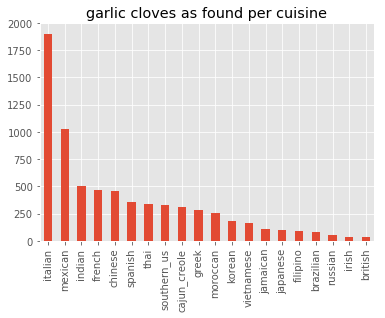

In [58]:
indices = df_train['all_ingredients'].str.contains('garlic cloves')
df_train[indices]['cuisine'].value_counts().plot(kind='bar',
                                                 title='garlic cloves as found per cuisine')
indicestest = df_test['all_ingredients'].str.contains('garlic cloves')

In [18]:
unique = np.unique(top10.values.ravel())
unique

array(['all-purpose flour', 'avocado', 'baking powder', 'baking soda',
       'black pepper', 'butter', 'buttermilk', 'cachaca',
       'cajun seasoning', 'carrots', 'cayenne pepper', 'chili powder',
       'coconut milk', 'corn starch', 'corn tortillas', 'cumin seed',
       'dried oregano', 'dried thyme', 'eggs', 'extra-virgin olive oil',
       'feta cheese crumbles', 'fish sauce', 'fresh lemon juice',
       'fresh lime juice', 'garam masala', 'garlic', 'garlic cloves',
       'ginger', 'grated parmesan cheese', 'green bell pepper',
       'green onions', 'ground allspice', 'ground black pepper',
       'ground cinnamon', 'ground cumin', 'ground ginger',
       'ground turmeric', 'jalapeno chilies', 'large eggs', 'lime', 'milk',
       'mirin', 'oil', 'olive oil', 'onions', 'paprika', 'pepper',
       'potatoes', 'red bell pepper', 'rice vinegar', 'sake', 'salt',
       'scallions', 'sesame oil', 'sesame seeds', 'shallots', 'sour cream',
       'soy sauce', 'sugar', 'tomatoes', 'un

In [20]:
cv = CountVectorizer()

In [74]:
X = cv.fit_transform(df_train['all_ingredients'].values)
Xtest = cv.fit_transform(df_test['all_ingredients'].values)

Xtest.shape

(9944, 2246)

In [39]:
enc = LabelEncoder()
y = enc.fit_transform(df_train.cuisine)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [61]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
logistic.score(X_test, y_test)

0.7808925204274042

In [47]:
X_test.shape

(7955, 3010)

In [66]:
Xtest.shape

(9944, 2246)

In [82]:
Xtest = Xtest[:, 2247:3010 = 0 ]

SyntaxError: invalid syntax (<ipython-input-82-63e43ce2697c>, line 1)

In [80]:
Xtest.shape

(9944, 2246)

In [71]:
print(X_test[1:10])

  (0, 2770)	1
  (0, 1094)	1
  (0, 1204)	1
  (0, 2349)	1
  (0, 1860)	1
  (0, 2133)	2
  (0, 1873)	1
  (0, 1961)	1
  (0, 549)	1
  (0, 1087)	1
  (0, 1645)	1
  (0, 596)	1
  (0, 1785)	1
  (0, 2238)	1
  (0, 1509)	2
  (0, 674)	1
  (0, 2413)	1
  (0, 953)	1
  (0, 2829)	1
  (0, 383)	1
  (0, 1369)	1
  (1, 1204)	1
  (1, 2349)	1
  (1, 1190)	2
  (1, 1860)	1
  :	:
  (7, 2349)	1
  (7, 1860)	1
  (7, 1873)	1
  (7, 1518)	1
  (7, 1386)	1
  (7, 1087)	1
  (7, 1645)	1
  (7, 1044)	1
  (7, 1118)	1
  (7, 1867)	1
  (7, 596)	1
  (7, 616)	1
  (7, 2820)	1
  (7, 539)	1
  (7, 1157)	1
  (8, 2349)	1
  (8, 1707)	2
  (8, 2133)	1
  (8, 2647)	1
  (8, 2943)	1
  (8, 2664)	1
  (8, 2261)	1
  (8, 1532)	1
  (8, 626)	2
  (8, 625)	1


In [63]:
pred = logistic.predict(df_test)

ValueError: X has 2246 features per sample; expecting 3010

In [50]:
df_test = pd.read_json('test.json')

In [51]:
Xtest = cv.fit_transform(df_test['all_ingredients'].values)


KeyError: 'all_ingredients'

AttributeError: 'DataFrame' object has no attribute 'cuisine'